<h1>Cours 3 : Analyse Factorielle des Correspondances et autres (TP 6)<span class="tocSkip"></span></h1>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Unique-Partie" data-toc-modified-id="Unique-Partie-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Unique Partie</a></span><ul class="toc-item"><li><span><a href="#Cours" data-toc-modified-id="Cours-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Cours</a></span><ul class="toc-item"><li><span><a href="#Rappels" data-toc-modified-id="Rappels-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Rappels</a></span></li></ul></li><li><span><a href="#Exercice" data-toc-modified-id="Exercice-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Exercice</a></span></li></ul></li></ul></div>

Il n'y aura qu'une seule partie pour ce cours, le principe de l'ACF est d'effectuer une sorte d'ACP vu dans le cours précédent, afin de l'appliquer sur des variables catégorielles. <br>


# Unique Partie

## Cours

L'Analyse Factorielle des Correspondances est une technique de visualisation statistique s'appliquant à des variables catégorielles.
Elle consiste à établir les relations de deux variables catégorielles entre elles en utilisant la table de contingence.

### Rappels

profil ligne : ligne d'un tableau de contingence dont chaque valeur est divisée par la somme des valeurs de la ligne. <br>
profil colonne : colonne d'un tableau de contingence dont chaque valeur est divisée par la somme des valeurs de la colonne.

L'ACF est une double ACP que l'on réalise sur les profils lignes et les profils colonnes de la table de contingence. Les résultats graphiques de ces deux analyses sont ensuites superposés pour produire un graphique de type nuage de points, ce qui permet d'étudier les relations entre lignes et colonnes.

## Exercice

1) Chargez "titanic.csv", ne conserver que les variables "Survived", "Classe", "Genre", "Age", "Prix", "Port".<br>
2) Redéfinissez les variables "Survived", "Classe", "Genre" et "Port" comme des variables catégorielles. <br>
3) Dressez toutes les modalités de ces variables catégorielles. <br>
4) Il y a-t-il des valeurs manquantes ? Sur quelles variables et combien ? <br>
5) Remplacez les valeurs manquantes par la médiane pour l'une et par "S" pour l'autre. <br>
6) Créez 4 catégories d'âge : Enfant (0-18), Jeune (18-30), Adulte (30-65), Senior (65+). <br>
7) Utilisez la fonction pd.qcut pour créer un découpage du prix en 4 quartiles. <br>
8) Conservez uniquement les variables catégorielles. <br>
9) Créez les variables dummies et le nuage des variables sur les 2 axes principaux.

In [2]:
import numpy as np
import pandas as pd
import mca
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("./data/titanic.csv")

In [5]:
df=pd.read_csv("./data/titanic.csv",skiprows=1,
  header=None,usecols=[1,2,4,5,9,11],
  names=["Surv","Classe","Genre","Age",
    "Prix","Port"],dtype={"Surv":object,
    "Classe":object,"Genre":object,"Port":object})

In [6]:
df.head()

,Surv,Classe,Genre,Age,Prix,Port
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [7]:
df.shape

(891, 6)

In [8]:
df["Surv"]=pd.Categorical(df["Surv"],ordered=False)
df["Classe"]=pd.Categorical(df["Classe"],
     ordered=False)
df["Genre"]=pd.Categorical(df["Genre"],
     ordered=False)
df["Port"]=pd.Categorical(df["Port"],ordered=False)
df.dtypes

Surv      category
Classe    category
Genre     category
Age        float64
Prix       float64
Port      category
dtype: object

In [9]:
print(df["Surv"].unique())
print(df["Classe"].unique())
print(df["Genre"].unique())
print(df["Port"].unique())

[0, 1]
Categories (2, object): [0, 1]
[3, 1, 2]
Categories (3, object): [3, 1, 2]
[male, female]
Categories (2, object): [male, female]
[S, C, Q, NaN]
Categories (3, object): [S, C, Q]


4)

In [10]:
np.sum(df.isnull())

Surv        0
Classe      0
Genre       0
Age       177
Prix        0
Port        2
dtype: int64

5)

In [11]:
df["Age"]=df["Age"].fillna(df["Age"].median())
df.Port=df["Port"].fillna("S")

In [12]:
df["cat_age"]=df["Age"].apply(lambda x : "Enfant" if x<18 else "Jeune" if x <30 else "Adulte" if x <65 else "Senior")

In [13]:
df

,Surv,Classe,Genre,Age,Prix,Port,cat_age
0,0,3,male,22.0,7.2500,S,Jeune
1,1,1,female,38.0,71.2833,C,Adulte
2,1,3,female,26.0,7.9250,S,Jeune
3,1,1,female,35.0,53.1000,S,Adulte
4,0,3,male,35.0,8.0500,S,Adulte
5,0,3,male,28.0,8.4583,Q,Jeune
6,0,1,male,54.0,51.8625,S,Adulte
7,0,3,male,2.0,21.0750,S,Enfant
8,1,3,female,27.0,11.1333,S,Jeune
9,1,2,female,14.0,30.0708,C,Enfant


In [14]:
df["cat_prix"]=pd.qcut(df["Prix"],4,labels=["Pr_1",
   "Pr_2","Pr_3","Pr_4"])

In [15]:
df2=df[["Surv","Classe","Genre","Port","cat_age","cat_prix"]]

In [16]:
df3=pd.DataFrame(pd.get_dummies(df2))

In [17]:
df3.shape

(891, 18)

44

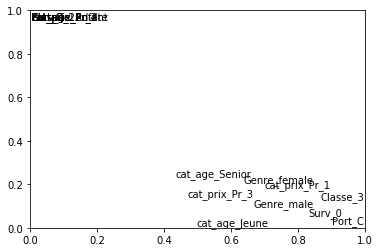

In [18]:
from adjustText import adjust_text
texts = [plt.text(df3.iloc[i,0], df3.iloc[i,1], df3.columns[i]) for i in range(df3.shape[1])]
adjust_text(texts)

In [2]:
df=pd.read_csv("../data/titanic.csv")

In [4]:
df=pd.read_csv("../data/titanic.csv",skiprows=1,
  header=None,usecols=[1,2,4,5,9,11],
  names=["Surv","Classe","Genre","Age",
    "Prix","Port"],dtype={"Surv":object,
    "Classe":object,"Genre":object,"Port":object})

In [5]:
df.head()

,Surv,Classe,Genre,Age,Prix,Port
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [6]:
df.shape

(891, 6)

In [8]:
df["Surv"]=pd.Categorical(df["Surv"],ordered=False)
df["Classe"]=pd.Categorical(df["Classe"],
     ordered=False)
df["Genre"]=pd.Categorical(df["Genre"],
     ordered=False)
df["Port"]=pd.Categorical(df["Port"],ordered=False)
df.dtypes

Surv      category
Classe    category
Genre     category
Age        float64
Prix       float64
Port      category
dtype: object

In [15]:
print(df["Surv"].unique())
print(df["Classe"].unique())
print(df["Genre"].unique())
print(df["Port"].unique())

[0, 1]
Categories (2, object): [0, 1]
[3, 1, 2]
Categories (3, object): [3, 1, 2]
[male, female]
Categories (2, object): [male, female]
[S, C, Q, NaN]
Categories (3, object): [S, C, Q]


4)

In [18]:
np.sum(df.isnull())

Surv        0
Classe      0
Genre       0
Age       177
Prix        0
Port        2
dtype: int64

5)

In [19]:
df["Age"]=df["Age"].fillna(df["Age"].median())
df.Port=df["Port"].fillna("S")

In [20]:
df["cat_age"]=df["Age"].apply(lambda x : "Enfant" if x<18 else "Jeune" if x <30 else "Adulte" if x <65 else "Senior")

In [21]:
df

,Surv,Classe,Genre,Age,Prix,Port,cat_age
0,0,3,male,22.0,7.2500,S,Jeune
1,1,1,female,38.0,71.2833,C,Adulte
2,1,3,female,26.0,7.9250,S,Jeune
3,1,1,female,35.0,53.1000,S,Adulte
4,0,3,male,35.0,8.0500,S,Adulte
5,0,3,male,28.0,8.4583,Q,Jeune
6,0,1,male,54.0,51.8625,S,Adulte
7,0,3,male,2.0,21.0750,S,Enfant
8,1,3,female,27.0,11.1333,S,Jeune
9,1,2,female,14.0,30.0708,C,Enfant


In [24]:
df["cat_prix"]=pd.qcut(df["Prix"],4,labels=["Pr_1",
   "Pr_2","Pr_3","Pr_4"])

In [27]:
df2=df[["Surv","Classe","Genre","Port","cat_age","cat_prix"]]

In [42]:
df3=pd.DataFrame(pd.get_dummies(df2))

In [45]:
df3.shape

(891, 18)

In [53]:
from adjustText import adjust_text
texts = [plt.text(df3.iloc[i,0], df3.iloc[i,1], df3.columns[i]) for i in range(df3.shape[1])]
adjust_text(texts)

[0.38989854 0.26614046 0.23843391 0.17336785 0.16884027 0.16190916
 0.14594437 0.12737903 0.10845971 0.10233293 0.07604058 0.04125321]


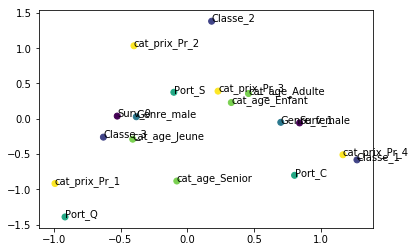

In [58]:
mca_df=mca.MCA(df3,benzecri=False)
# Valeurs singulières
print(mca_df.L)
# Composantes principales des colonnes (modalités) print(mca_df.fs_c())
# Premier plan principal
col=[1,1,2,2,2,3,3,4,4,4,5,5,5,5,6,6,6,6]
plt.scatter(mca_df.fs_c()[:, 0],
   mca_df.fs_c()[:, 1],c=col)
for i, j, nom in zip(mca_df.fs_c()[:, 0],mca_df.fs_c()[:, 1], dc.columns):
    plt.text(i, j, nom)
plt.show()